In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
x_vals = np.linspace(-5, 5, 1000)

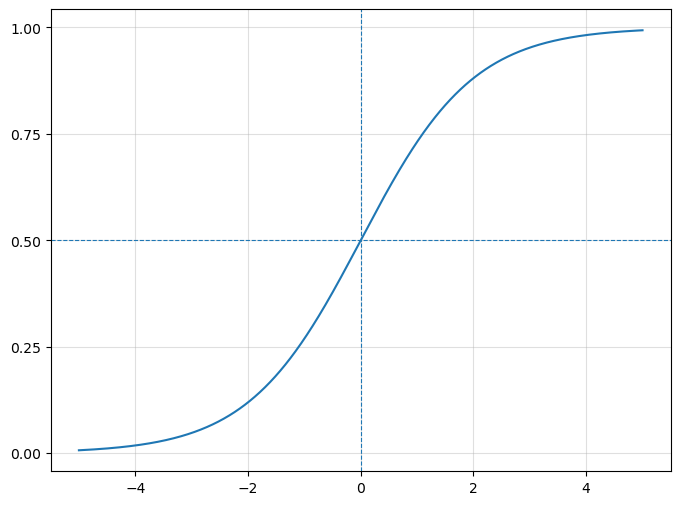

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_vals, sigmoid(x_vals))
ax.axhline(y=0.5, linestyle='dashed', linewidth=0.8)
ax.axvline(x=0, linestyle='dashed', linewidth=0.8)
ax.grid(True, alpha=0.4, zorder=1)
ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0]);

In [2]:
iris = load_iris()
X = iris.data
y = (iris.target == 2).astype(int)    # Virginica

In [9]:
def plot_decision_boundary(X, y):
    # Dimensionality reduction to visualize the decision boundary in 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Principal component (logistic) regression
    clf = LogisticRegression(max_iter=1000).fit(X_pca, y)
    
    # Create a meshgrid
    x_min, x_max = X_pca[:,0].min() - 0.5, X_pca[:,0].max() + 0.5
    y_min, y_max = X_pca[:,1].min() - 0.5, X_pca[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), 
                         np.linspace(y_min, y_max, 500))
    
    # Predict class label on each grid point
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Plot the decision boundary
    fig, ax = plt.subplots(figsize=(8,6))
    ax.contourf(xx, yy, Z, alpha=0.4)
    
    # Plot the transformed data
    markers = ['o', '^']
    colors = ['blue', 'orange']
    class_names = ['non-virginica', 'virginica']
    
    for i, label in enumerate(np.unique(y)):
        X_sub = X_pca[y == label]
        ax.scatter(X_sub[:,0], 
                   X_sub[:,1], 
                   marker=markers[i], 
                   color=colors[i], 
                   label=class_names[i],
                   edgecolor='k')
    ax.legend()
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0] * 100:.2f}%)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1] * 100:.1f}%)')    

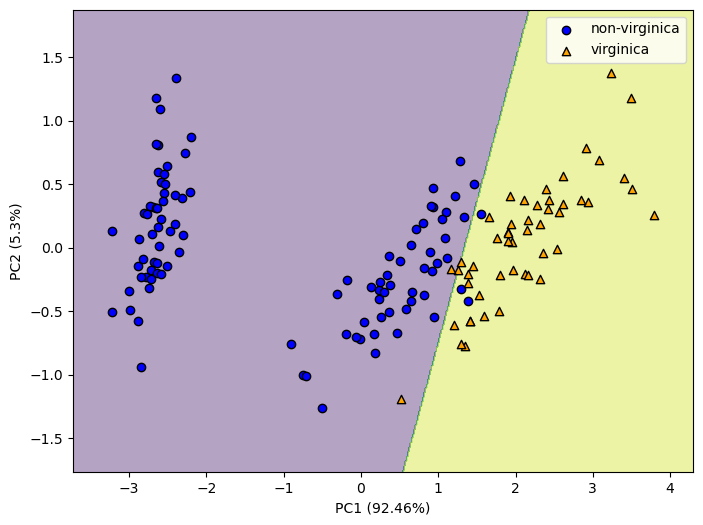

In [10]:
plot_decision_boundary(X, y)